# EDA of Canada

------

##### Exploratory data analsysis of the 2016 Canadian census. 

> [By: Graham Pinsnet](https://twitter.com/GrahamPinsent)  
> [Linkedin](https://www.linkedin.com/in/graham-pinsent/)  
> [GitHub](https://github.com/PerryGraham?tab=repositories)

**Tools used:** Python, pandas, matplotlib, seaborn. 

The purpose of this notebook is to turn boring tables of data and make an interesting story about what life in Canada is like. If you have any feedback, please leave a comment. Enjoy. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

censusdata = pd.read_csv("Census.csv",  encoding= 'unicode_escape')

censusdata.head()

,Topic,Characteristics,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_Female,Total.1,Flag_Total.1,Male.1,Flag_Male.1,Female.1,Flag_Female.1
0,Population and dwellings,Population; 2016,1.0,35151728.0,NaN,NaN,...,NaN,...,35151728.0,NaN,NaN,...,NaN,...
1,Population and dwellings,Population; 2011,1.0,33476688.0,NaN,NaN,...,NaN,...,33476688.0,NaN,NaN,...,NaN,...
2,Population and dwellings,Population percentage change; 2011 to 2016,NaN,5.0,NaN,NaN,...,NaN,...,5.0,NaN,NaN,...,NaN,...
3,Population and dwellings,Total private dwellings,2.0,15412443.0,NaN,NaN,...,NaN,...,15412443.0,NaN,NaN,...,NaN,...
4,Population and dwellings,Private dwellings occupied by usual residents,3.0,14072079.0,NaN,NaN,...,NaN,...,14072079.0,NaN,NaN,...,NaN,...


In [2]:
censusdata = censusdata.drop(columns=["Note","Flag_Total",
                                      "Flag_Male","Flag_Female",
                                      "Flag_Total","Flag_Total.1",
                                      "Flag_Male.1","Flag_Female.1",
                                      "Male.1","Female.1","Total.1"])

In [3]:
censusdata.head()

,Topic,Characteristics,Total,Male,Female
0,Population and dwellings,Population; 2016,35151728.0,NaN,NaN
1,Population and dwellings,Population; 2011,33476688.0,NaN,NaN
2,Population and dwellings,Population percentage change; 2011 to 2016,5.0,NaN,NaN
3,Population and dwellings,Total private dwellings,15412443.0,NaN,NaN
4,Population and dwellings,Private dwellings occupied by usual residents,14072079.0,NaN,NaN


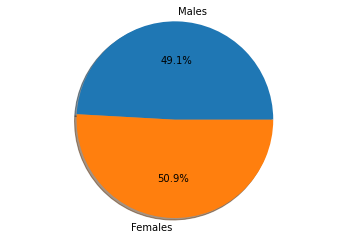

Population of Canada: 35.15 Million


In [4]:
males = censusdata["Male"][7]
females = censusdata["Female"][7]
pop = censusdata["Total"][7] / 1000000

fig1, ax1 = plt.subplots()
ax1.pie([males,females], labels=["Males","Females"], autopct = '%1.1f%%', shadow=True)
ax1.axis("equal")
plt.show()
print("Population of Canada: {:.2f}".format(pop), "Million")

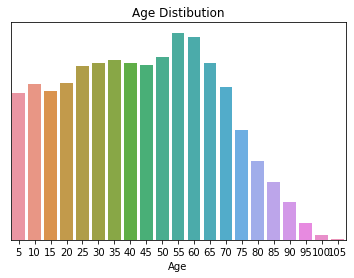

In [5]:
age = censusdata.iloc[9:33]
age = age.drop([12,23,28])
age = age.reset_index()
xlabels=[]
count=5
for i in range(int((100/5)+1)):
    xlabels.append(count)
    count += 5 
ax = sns.barplot(x=age.index, y=age.Total , data=age)
ax.set(ylabel=None)
ax.set(yticklabels=[])
ax.set(title="Age Distibution")
ax.set(xlabel="Age")
ax.axes.get_yaxis().set_visible(False)
ax.set(xticklabels=xlabels);

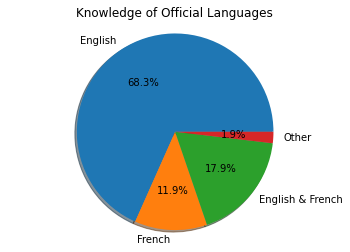

In [6]:
lang = censusdata.iloc[100:104]
fig2, ax3 = plt.subplots()
ax3.pie(lang["Total"], labels=["English","French","English & French","Other"], autopct = '%1.1f%%', shadow=True)
ax3.axis("equal")
plt.title("Knowledge of Official Languages")
plt.show()

Over 261 mother tongue languages spoken


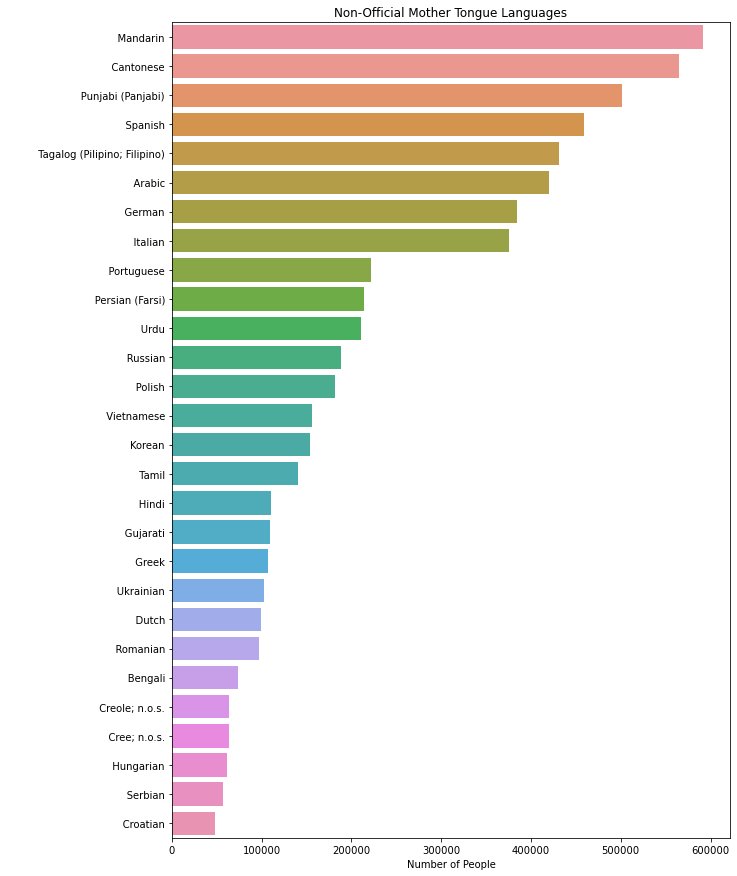

In [7]:
mothertongue1 = censusdata.iloc[114:375]
mothertongue1.columns = ['topic', 'characteristics', 'total', 'male', 'female']
mothertongue = mothertongue1.sort_values(by=["total"], ascending=False)
mothertongue = mothertongue[~mothertongue["characteristics"].str.contains("languages")]
mothertongue = mothertongue.iloc[2:30,[1,2]]
#print(mothertongue[:20])

f, ax = plt.subplots(figsize= (10,15))

sns.set_color_codes("pastel")
sns.barplot(x="total", y="characteristics", data=mothertongue,
            label="Total")

ax.set(xlabel="Number of People",
      ylabel="", title="Non-Official Mother Tongue Languages")

print("Over",len(mothertongue1),"mother tongue languages spoken")

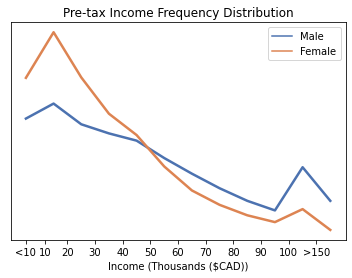

In [8]:
income = censusdata.iloc[694:707]
income = income.drop([704])
income = income.reset_index()
income = income.loc[:,["Male","Female"]]

xlabels= ["<10","10","20","30","40","50","60","70","80","90","100",">150"]
x = [0,0.7,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]

ax = sns.lineplot(data=income, palette="deep", dashes=False, linewidth=2.5)
ax.set_xticks(x)
ax.set(xlabel="Income (Thousands ($CAD))", title="Pre-tax Income Frequency Distribution")
ax.set_xticklabels(xlabels);
ax.axes.get_yaxis().set_visible(False)


28.6% of the population of Canada are immigrants


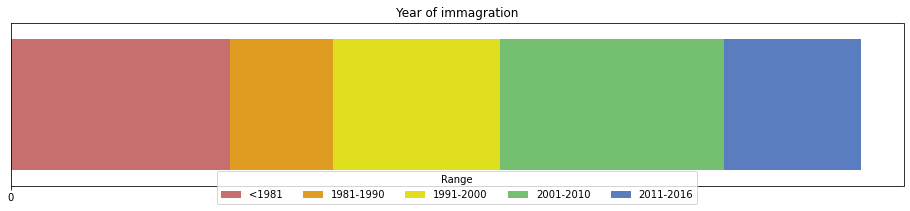

In [9]:
imm = censusdata.iloc[1140:1149,1:3]
ratioimm = censusdata.iloc[1141,2]/censusdata.iloc[1140,2]*100
print("{:.1f}%".format(ratioimm), "of the population of Canada are immigrants")

imm = imm.drop([1140,1141,1146,1147])

imm["sum"] = imm.Total.cumsum()

imm1 = imm.iloc[0:1]
imm2 = imm.iloc[1:2]
imm3 = imm.iloc[2:3]
imm4 = imm.iloc[3:4]
imm5 = imm.iloc[4:]

f, ax = plt.subplots(figsize=(16,3))

sns.set_color_codes("muted")
sns.barplot(x="sum", y="Characteristics", data=imm5, label="2011-2016", color='b')\

sns.barplot(x="sum", y="Characteristics", data=imm4, label="2001-2010", color='g')

sns.barplot(x="sum", y="Characteristics", data=imm3, label="1991-2000", color='yellow')

sns.barplot(x="sum", y="Characteristics", data=imm2, label="1981-1990", color='orange')

sns.barplot(x="Total", y="Characteristics", data=imm1, label="<1981", color='r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Range', loc='lower center' , ncol=5,bbox_to_anchor=(0.5, -0.14))
ax.set_xticks([0])
ax.set(xlabel="", title="Year of immagration")
ax.axes.get_yaxis().set_visible(False)

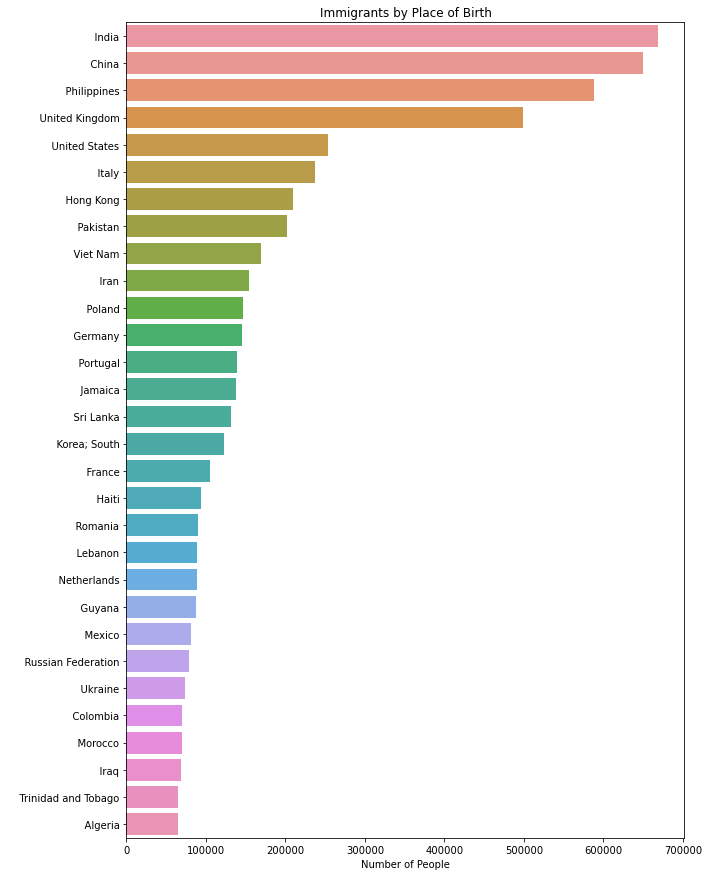

In [10]:
immloc = censusdata.iloc[1157:1216,1:3]
immloc = immloc.drop([1157,1168,1169,1186,1187,1196,1197,1214,1215])
immloc = immloc.sort_values(by=["Total"], ascending=False)
immloc = immloc.iloc[:30]

f, ax = plt.subplots(figsize= (10,15))

sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Characteristics", data=immloc,
            label="Total")

ax.set(xlabel="Number of People",
      ylabel="", title="Immigrants by Place of Birth");

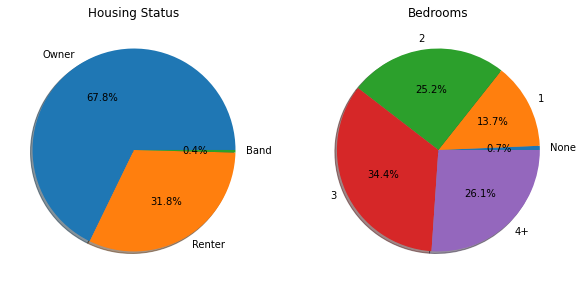

In [15]:
house = censusdata.iloc[1617:1620,1:3]
bed = censusdata.iloc[1624:1629,1:3]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.pie(house["Total"], labels=["Owner","Renter","Band"], autopct = '%1.1f%%', shadow=True,)
ax1.set(title="Housing Status")
ax2.pie(bed["Total"], labels=["None","1","2","3","4+"], autopct = '%1.1f%%', shadow=True,)
ax2.set(title="Bedrooms")
ax1.plot()
ax2.plot();


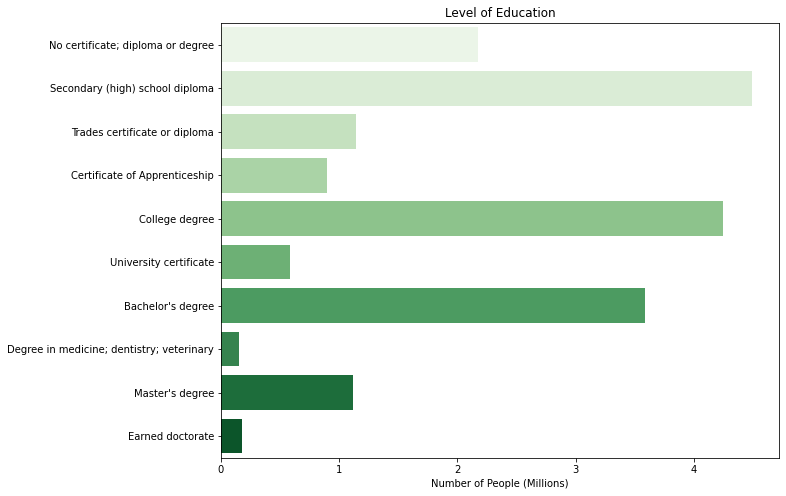

In [96]:
ed = censusdata.iloc[1698:1712,1:3]
ed = ed.drop([1700,1701,1706,1708])
ed["Total"] = ed["Total"]/1000000

f, ax = plt.subplots(figsize= (10,8))


sns.barplot(x="Total", y="Characteristics", data=ed,
            label="Total", palette="Greens")
    
ax.set(yticklabels=["No certificate; diploma or degree","Secondary (high) school diploma",
                    "Trades certificate or diploma","Certificate of Apprenticeship","College degree",
                    "University certificate","Bachelor's degree",
                    "Degree in medicine; dentistry; veterinary","Master's degree","Earned doctorate"])

ax.ticklabel_format(axis="x", style="plain")
ax.set(xlabel="Number of People (Millions)",
      ylabel="", title="Level of Education");

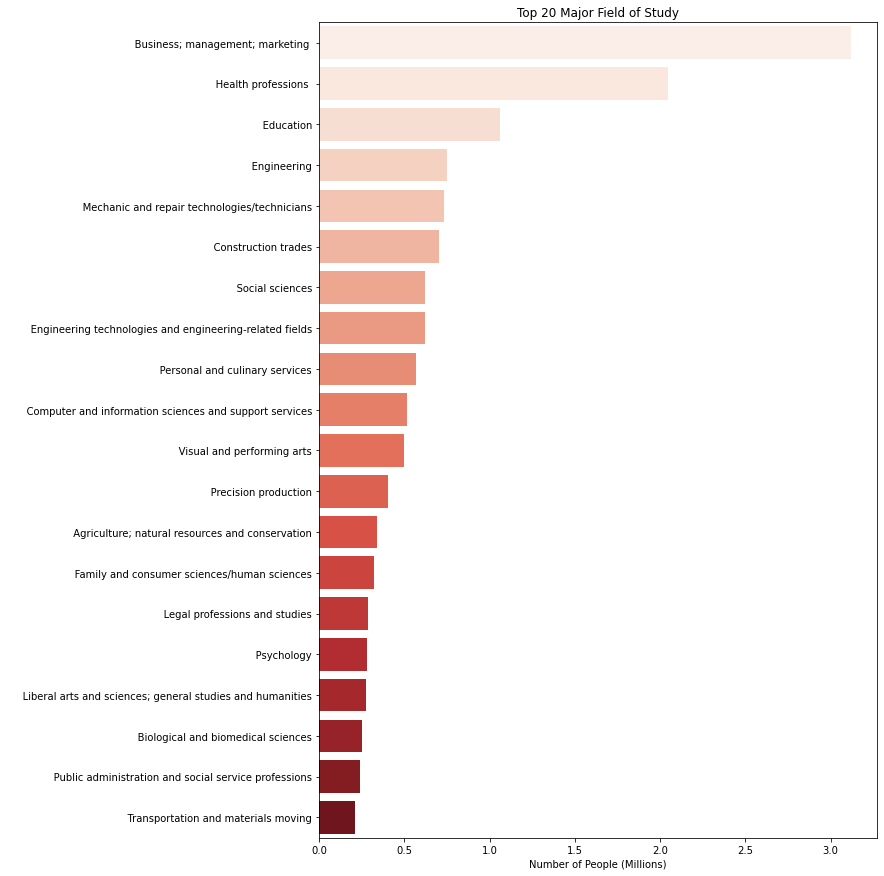

In [97]:
study = censusdata.iloc[1715:1773,1:3]
study = study.drop([1716,1719,1728,1736,1746,1740,1751,1762,1766])
study = study.sort_values(by="Total", ascending=False)
study["Total"] = study["Total"]/1000000

study = study.iloc[:20]
study["Characteristics"] = study["Characteristics"].str.replace("\d+\.","")
study["Characteristics"] = study["Characteristics"].str.replace("and related.*","")

f, ax = plt.subplots(figsize= (10,15))

sns.barplot(x="Total", y="Characteristics", data=study,
            label="Total", palette="Reds")
    
ax.ticklabel_format(axis="x", style="plain")
ax.set(xlabel="Number of People (Millions)",
      ylabel="", title="Top 20 Major Field of Study");

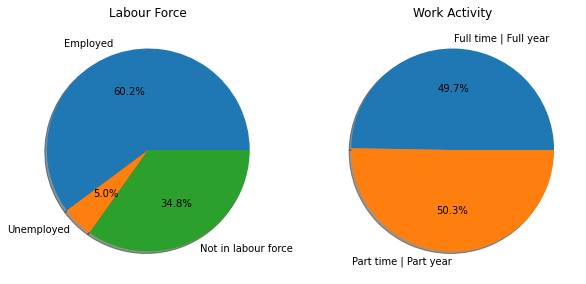

In [89]:
work = censusdata.iloc[1866:1869,1:3]
worktype = censusdata.iloc[1875:1877,1:3]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.pie(work["Total"], labels=["Employed","Unemployed","Not in labour force"], autopct = '%1.1f%%', shadow=True,)
ax1.set(title="Labour Force")
ax2.pie(worktype["Total"], labels=["Full time | Full year","Part time | Part year"], autopct = '%1.1f%%', shadow=True,)
ax2.set(title="Work Activity")
ax1.plot()
ax2.plot();


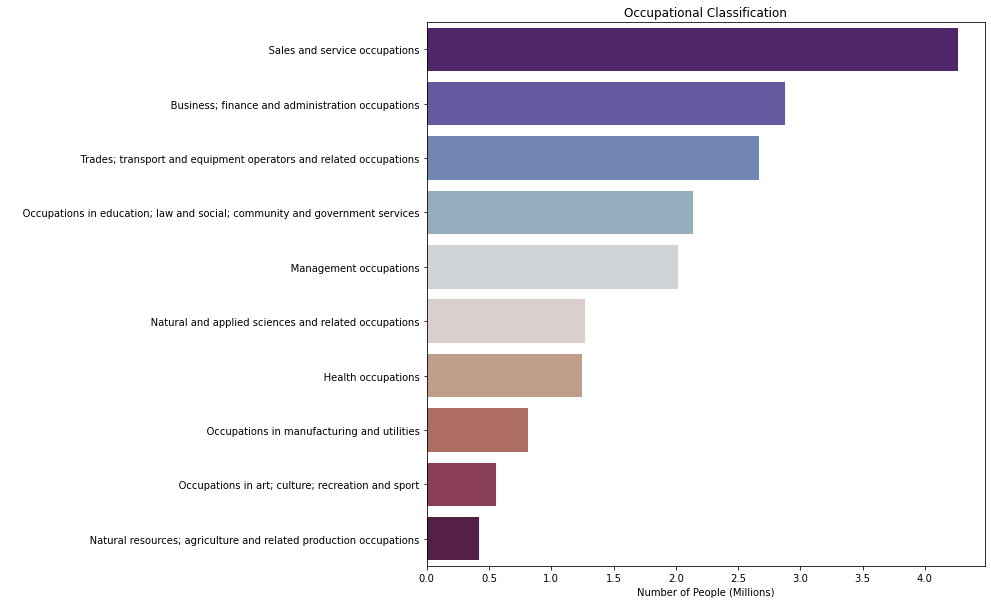

In [103]:
workplace = censusdata.iloc[1886:1896,1:3]
workplace = workplace.sort_values(by="Total", ascending=False)
workplace["Total"] = workplace["Total"]/1000000
workplace["Characteristics"] = workplace["Characteristics"].str.replace("\d+","")

f, ax = plt.subplots(figsize= (10,10))

sns.barplot(x="Total", y="Characteristics", data=workplace,
            label="Total", palette="twilight_shifted")
    
ax.ticklabel_format(axis="x", style="plain")
ax.set(xlabel="Number of People (Millions)",
      ylabel="", title="Occupational Classification");